In [1]:
from keras.models import *
import numpy as np
# import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import time

def millis():
    return int(round(time.time() * 1000))

Using TensorFlow backend.
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/buikhoi/.local/lib/python3.6/site-packages/tensorflow/py

In [5]:
from Models.refinenet.refinennet_model import *
model = Refinenet()
run_model = model.chose_model(0)[0]
run_model.load_weights('./Checkpoints/refine30.h5')
run_model.summary()


Model: "lightweight_refinenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 246, 326, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
res_b_0_conv (Conv2D)           (None, 120, 160, 64) 9472        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
res_b_0_batch (BatchNormalizati (None, 120, 160, 64) 256         res_b_0_conv[0][0]               
_____________________________________________________________________________

In [9]:
from Models.enet.model import *
#with open('./Checkpoints/enet_nhatrang.json', 'r') as read_file:
 #   run_model = model_from_json(read_file.read())
run_model = enet_build(6, 320, 240)
run_model.load_weights('./Checkpoints/enet_rviou.h5')
run_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 120, 160, 13) 364         image[0][0]                      
__________________________________________________________________________________________________
max_pooling_with_argmax2d_1 (Ma [(None, 120, 160, 3) 0           image[0][0]                      
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 120, 160, 16) 0           conv2d_1[0][0]                   
                                                                 max_pooling_with_argmax2d_

In [2]:
with open('./Checkpoints/fcn25.json', 'r') as read_file:
    run_model = model_from_json(read_file.read())
run_model.load_weights('./Checkpoints/fcn25.h5')
run_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 320, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 240, 320, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 240, 320, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 240, 320, 16) 2320        conv2d_2[0][0]                   
___________________________________________________________________________________________

Predicting took 10 millis


Text(0.5, 1.0, 'Predict sign')

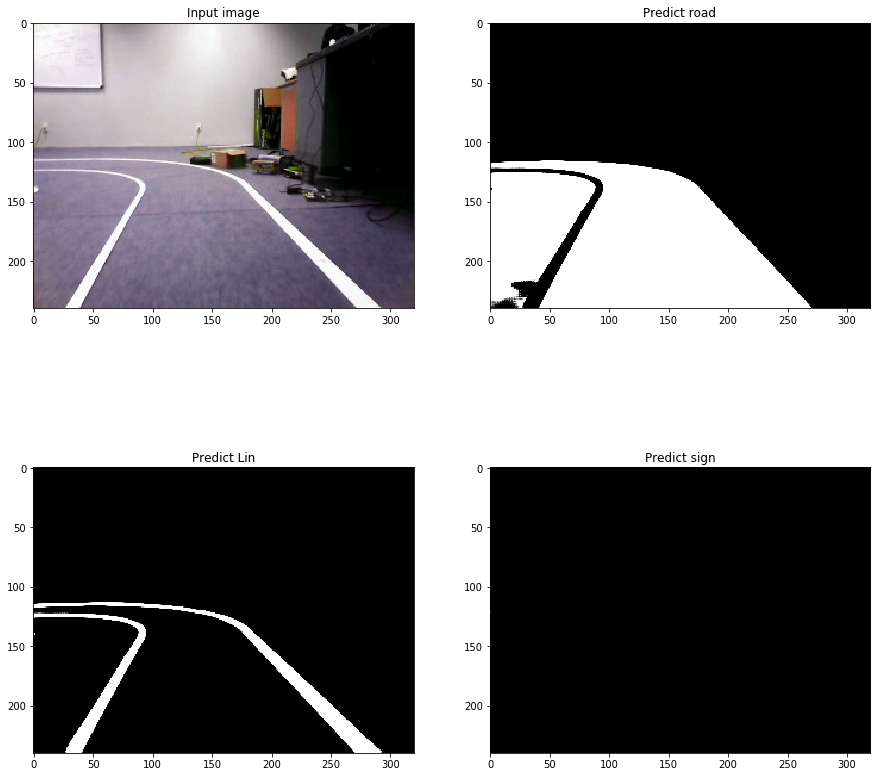

In [23]:
rand = np.random.randint(300)
count = 0
for iii in os.listdir('./Data/SPKT_LHU/Training/val/'):
    if count < rand:
        count += 1
        continue
    else:
        temp = np.load('./Data/SPKT_LHU/Training/val/' + iii)
        img = temp['img']
        break
# img = cv2.resize(img.astype(np.float32), (473, 473))
# pred = np.reshape(pred[0], (473, 473, 6))
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(img.astype('float'))
plt.title('Input image')
img = np.expand_dims(img, 0)
mil = millis()
pred = run_model.predict(img)
print('Predicting took {} millis'.format(millis() - mil))

plt.subplot(2, 2, 2)
plt.imshow(pred[0][:, :, 0].astype('float'), 'gray')
plt.title('Predict road')

plt.subplot(2, 2, 3)
plt.imshow(pred[0][:, :, 1].astype('float'), 'gray')
plt.title('Predict Lin')

plt.subplot(2, 2, 4)
plt.imshow(pred[0][:, :, 2].astype('float'), 'gray')
plt.title('Predict sign')

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(temp['img'].astype('float'))
plt.title('Input image')
img = np.expand_dims(img, 0)
mil = millis()
pred = temp['anno']
print('Predicting took {} millis'.format(millis() - mil))

plt.subplot(2, 2, 2)
plt.imshow(pred[:, :, 0].astype('float'), 'gray')
plt.title('Label road')

plt.subplot(2, 2, 3)
plt.imshow(pred[:, :, 1].astype('float'), 'gray')
plt.title('Label Line')

plt.subplot(2, 2, 4)
plt.imshow(pred[:, :, 2].astype('float'), 'gray')
plt.title('Label sign')

In [20]:
pred[:, :, 0].min()

-1.0

Text(0.5, 1.0, 'Predict car')

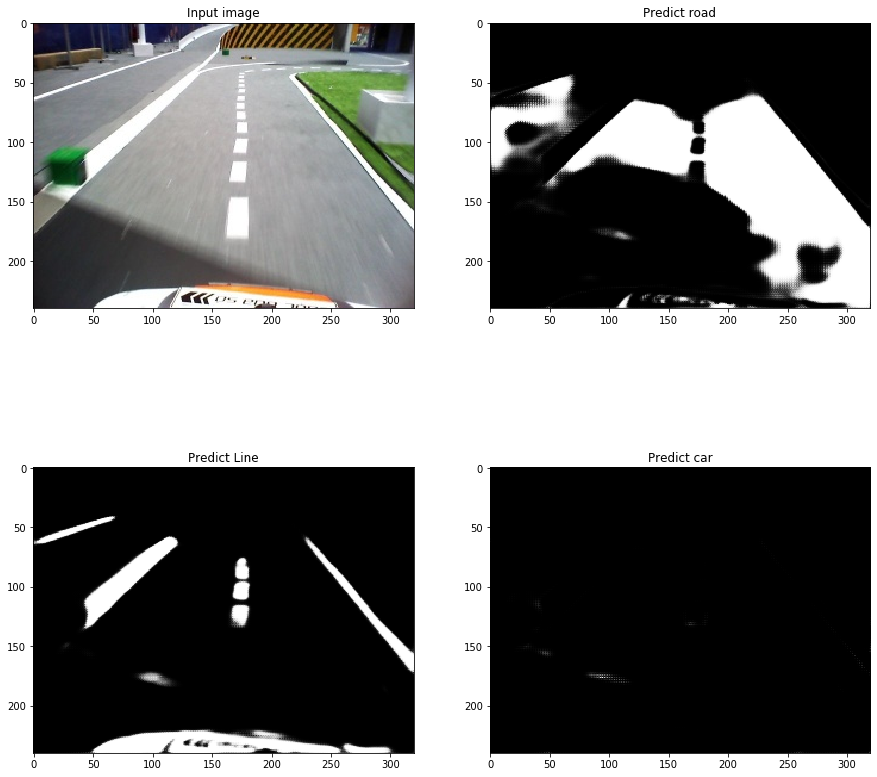

In [34]:
rand = np.random.randint(97)
count = 0
for iii in os.listdir('./Data/Nhatrang/Road/Test img/'):
    if count < rand:
        count += 1
        continue
    else:
        img = cv2.imread('./Data/Nhatrang/Road/Test img/' + iii)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        break
img = img/255

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(img.astype('float'))
plt.title('Input image')
img = np.expand_dims(img, 0)
pred = run_model.predict(img)

plt.subplot(2, 2, 2)
plt.imshow(pred[0][:, :, 0].astype('float'), 'gray')
plt.title('Predict road')

plt.subplot(2, 2, 3)
plt.imshow(pred[0][:, :, 1].astype('float'), 'gray')
plt.title('Predict Line')

plt.subplot(2, 2, 4)
plt.imshow(pred[0][:, :, 3].astype('float'), 'gray')
plt.title('Predict car')

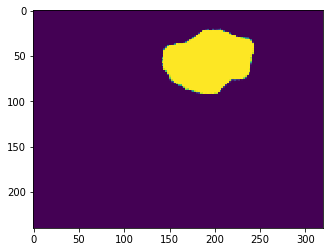

In [38]:
temp = pred[0][:, :, 3]
temp = np.clip(temp, 0, 1)
plt.imshow(cv2.resize(temp.astype('float'), (320, 240)))

In [39]:
pred[0, :, :, 3]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4901161e-07,
        8.9406967e-08, 1.1920929e-07],
       [0.0000000e+00, 0.0000000e+00, 2.9802322e-08, ..., 5.9604645e-08,
        1.1920929e-07, 1.7881393e-07],
       [2.9802322e-08, 8.9406967e-08, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [5.2452087e-06, 4.5299530e-06, 0.0000000e+00, ..., 5.9604645e-08,
        1.1920929e-07, 5.9604645e-08],
       [7.7486038e-07, 1.1920929e-06, 2.9802322e-08, ..., 1.1920929e-07,
        1.4901161e-07, 2.0861626e-07],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

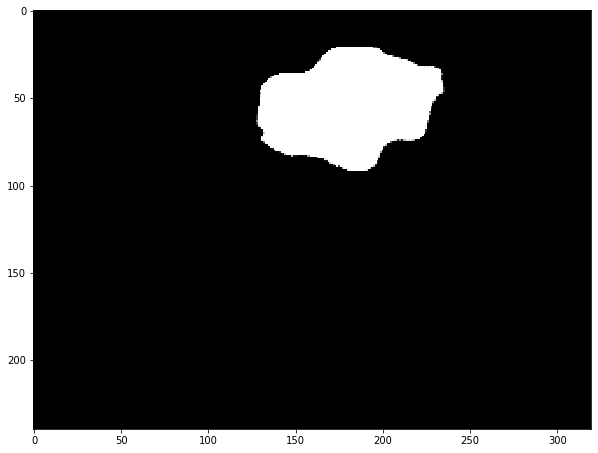

In [36]:
plt.figure(figsize = (10, 10))
plt.imshow(pred[0][:, :, 3], 'gray')

In [3]:
cap = cv2.VideoCapture('./Data/SPKT_LHU/Videos/LHU.avi')
vid_out = cv2.VideoWriter('LHU_unet25.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 5, (320, 240))
count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if count < 5:
        count += 1
        continue
    else:
        count = 0
    if ret:
#         cv2.imshow('RGB', frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = (frame/255).astype('float')
        img = cv2.resize(img, (320, 240))
        pred = run_model.predict(np.expand_dims(img, 0))[0]
#         cv2.imshow('Road', pred[:, :, 0])
#         cv2.imshow('Line', pred[:, :, 1])
#         cv2.imshow('Car', pred[:, :, 3])
        temp = np.zeros((240, 320, 3), np.uint8)
        temp[:, :, 0] = pred[:, :, 0] * 255
        temp[:, :, 1] = pred[:, :, 1] * 255
        temp[:, :, 2] = pred[:, :, 2] * 255
        vid_out.write(temp)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        time.sleep(0.005)
    else:
        break
cap.release()
vid_out.release()
cv2.destroyAllWindows()

1.0